# Cancer Cell Line Encyclopedia (CCLE)

Author: Moshe Silverstein <br/>
Date: 7-17 <br/>
Data Source: http://software.broadinstitute.org/software/cprg/?q=node/11

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [76]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/CCLE/my_functions.py'>

# Versions Of Modules In Use

In [4]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.2.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
Mon Feb 12 15:05:47 2018 EST

## Load Sample Metadata 

In [5]:
sample_meta = pd.read_csv('Input/CCLE_Expression.Arrays.sif_2012-10-18.txt', sep='\t', index_col=1)

In [6]:
sample_meta.head()

,ID,Cell line primary name,Gender,Batch,Site Primary,Histology,Hist Subtype1
CCLE name,,,,,,,
LN18_CENTRAL_NERVOUS_SYSTEM,METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A02_240852,LN-18,M,1,central_nervous_system,glioma,astrocytoma_Grade_IV
769P_KIDNEY,METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A05_240858,769-P,F,1,kidney,carcinoma,clear_cell_renal_cell_carcinoma
786O_KIDNEY,METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A07_240862,786-O,M,1,kidney,carcinoma,clear_cell_renal_cell_carcinoma
CAOV3_OVARY,METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A08_240864,Caov-3,F,1,ovary,carcinoma,adenocarcinoma
HEPG2_LIVER,METIS_p_NCLE_RNA1_Human_U133_Plus_2.0_A09_240866,Hep G2,M,1,liver,carcinoma,hepatocellular_carcinoma


## Load Data

In [7]:
matrix = pd.read_csv('Input/CCLE_Expression_Entrez_2012-09-29.gct', sep='\t', skiprows=2)

/Users/moshesilverstein/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
matrix.head()

,Name,Description,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
0,100009676_at,LOC100009676,5.987545,5.444892,5.838828,6.074743,5.788600,5.459675,5.755560,7.190493,...,5.473156,5.517208,5.858379,5.196033,5.831437,5.362021,5.799747,5.865606,5.463812,5.720593
1,10000_at,AKT3,6.230233,7.544216,7.328450,4.270720,4.478293,6.212102,7.562398,8.642669,...,6.375324,6.119814,6.561409,4.521773,6.830904,7.031690,4.881235,6.914640,5.313795,5.757825
2,10001_at,MED6,9.363550,8.715909,8.410834,9.845271,9.761157,10.532820,10.393960,9.478429,...,8.849773,8.767192,8.521635,8.224544,9.325785,8.362727,8.990524,8.958629,9.748100,9.758431
3,10002_at,NR2E3,3.803069,4.173643,3.776557,3.934091,3.822202,3.949198,3.807546,3.930186,...,3.717506,3.977377,3.659459,3.933996,4.515748,4.434658,4.127832,3.942736,4.062648,4.074257
4,10003_at,NAALAD2,3.586430,3.663081,4.047007,3.817250,6.444302,4.081071,5.462774,4.252446,...,3.520843,4.036661,4.168351,3.535915,4.445632,3.622032,5.436580,3.666404,3.556565,3.728828


## Set Matrix to Show Gene Symbols

In [9]:
matrix.rename(columns={'Description':'Gene Symbol'}, inplace=True)

In [10]:
matrix.set_index('Gene Symbol', inplace=True)

In [11]:
matrix.drop('Name', axis=1, inplace=True)

In [12]:
matrix.head()

,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,MIAPACA2_PANCREAS,MCAS_OVARY,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100009676,5.987545,5.444892,5.838828,6.074743,5.788600,5.459675,5.755560,7.190493,5.449818,5.801820,...,5.473156,5.517208,5.858379,5.196033,5.831437,5.362021,5.799747,5.865606,5.463812,5.720593
AKT3,6.230233,7.544216,7.328450,4.270720,4.478293,6.212102,7.562398,8.642669,5.556191,6.808673,...,6.375324,6.119814,6.561409,4.521773,6.830904,7.031690,4.881235,6.914640,5.313795,5.757825
MED6,9.363550,8.715909,8.410834,9.845271,9.761157,10.532820,10.393960,9.478429,9.112954,9.815614,...,8.849773,8.767192,8.521635,8.224544,9.325785,8.362727,8.990524,8.958629,9.748100,9.758431
NR2E3,3.803069,4.173643,3.776557,3.934091,3.822202,3.949198,3.807546,3.930186,4.161937,4.028581,...,3.717506,3.977377,3.659459,3.933996,4.515748,4.434658,4.127832,3.942736,4.062648,4.074257
NAALAD2,3.586430,3.663081,4.047007,3.817250,6.444302,4.081071,5.462774,4.252446,3.932451,3.835827,...,3.520843,4.036661,4.168351,3.535915,4.445632,3.622032,5.436580,3.666404,3.556565,3.728828


In [13]:
matrix.describe()

,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,MIAPACA2_PANCREAS,MCAS_OVARY,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
count,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,...,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000
mean,6.392509,6.361752,6.389624,6.424917,6.409577,6.399662,6.400879,6.396145,6.378974,6.388408,...,6.395383,6.401908,6.396075,6.410554,6.415298,6.403638,6.429287,6.406061,6.414137,6.411566
std,2.476663,2.444236,2.454103,2.443434,2.462514,2.493796,2.489144,2.479179,2.479545,2.431080,...,2.393057,2.433152,2.437164,2.374489,2.442144,2.355056,2.402895,2.430087,2.416088,2.409713
min,2.911527,3.026489,2.991723,2.838242,3.084948,3.041080,2.944501,3.030975,2.955308,3.010340,...,3.002687,3.008906,2.931140,3.011274,3.034197,2.978724,2.937079,2.936843,3.006759,3.048301
25%,4.144693,4.207482,4.201661,4.213125,4.192779,4.212337,4.150795,4.133131,4.149236,4.246795,...,4.287540,4.265795,4.200506,4.324980,4.223801,4.312183,4.332273,4.250722,4.273084,4.306641
50%,5.800889,5.637650,5.686744,5.922342,5.799001,5.582370,5.837714,5.840426,5.695158,5.703540,...,5.864555,5.775918,5.842422,5.862910,5.861589,5.912365,5.838430,5.813116,5.851116,5.797804
75%,8.306252,8.216170,8.251510,8.217642,8.297240,8.357944,8.292600,8.315540,8.333925,8.207674,...,8.149455,8.243115,8.250947,8.142254,8.272035,8.144877,8.209870,8.247344,8.214053,8.194195
max,14.850800,14.778780,14.765750,14.883320,14.729360,14.850800,14.875250,14.885850,14.869950,14.864990,...,14.842440,14.882780,14.870020,14.893560,14.869340,14.911120,14.882940,14.796310,14.904380,14.847490


# Histogram of First Sample

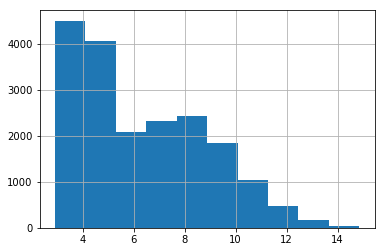

In [14]:
matrix.iloc[:, 0].hist();

# Histogram of First Gene

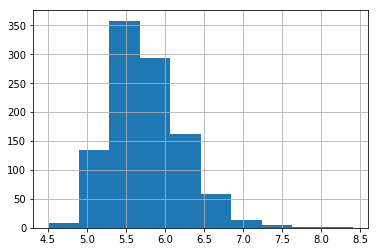

In [15]:
matrix.iloc[0, :].hist();

# Save Unfiltered Sample Matrix To File

In [16]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [17]:
normalized_matrix = mf.removeAndImpute(matrix)

# Log2 Transform

In [18]:
normalized_matrix = mf.log2(normalized_matrix)

In [19]:
normalized_matrix.head()

,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,MIAPACA2_PANCREAS,MCAS_OVARY,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
Gene Symbol,,,,,,,,,,,,,,,,,,,,,
LOC100009676,2.804786,2.688156,2.773749,2.822678,2.763114,2.691462,2.756075,3.033950,2.689258,2.765921,...,2.694469,2.704254,2.777868,2.631345,2.772189,2.669485,2.765481,2.779387,2.692385,2.748589
AKT3,2.854042,3.094948,3.058048,2.398000,2.453726,2.850420,3.098015,3.269433,2.712858,2.965077,...,2.882706,2.831840,2.918655,2.465132,2.969179,3.005704,2.556119,2.984524,2.658507,2.756559
MED6,3.373446,3.280349,3.234323,3.438994,3.427761,3.527673,3.510197,3.389351,3.338133,3.435044,...,3.300090,3.287944,3.251209,3.205478,3.368180,3.226929,3.320560,3.315947,3.426010,3.427396
NR2E3,2.263957,2.371181,2.255971,2.302784,2.269692,2.307195,2.265301,2.301642,2.367913,2.330151,...,2.238024,2.315386,2.220162,2.302757,2.463557,2.442189,2.358349,2.305310,2.339892,2.343197
NAALAD2,2.197372,2.221283,2.335428,2.268210,2.896137,2.345133,2.692154,2.392989,2.302305,2.273763,...,2.176592,2.332468,2.369704,2.181394,2.445099,2.208527,2.686294,2.222311,2.187947,2.241483


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [20]:
# normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [21]:
# normalized_matrix.head()

# Nomalize Matrix (z-score the rows)

In [22]:
genes = normalized_matrix.index.values.tolist()

In [23]:
normalized_matrix.reset_index(inplace=True)

In [24]:
normalized_matrix.drop('Gene Symbol', axis=1, inplace=True)

In [25]:
mf.zscore(normalized_matrix, 'row')

In [26]:
normalized_matrix.index = genes

In [27]:
normalized_matrix.describe()

,LN18_CENTRAL_NERVOUS_SYSTEM,769P_KIDNEY,786O_KIDNEY,CAOV3_OVARY,HEPG2_LIVER,MOLT4_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,NCIH524_LUNG,NCIH209_LUNG,MIAPACA2_PANCREAS,MCAS_OVARY,...,SLR21_KIDNEY,LNZ308_CENTRAL_NERVOUS_SYSTEM,LN340_CENTRAL_NERVOUS_SYSTEM,HCC827GR5_LUNG,SLR20_KIDNEY,HK2_KIDNEY,EW8_BONE,UOK101_KIDNEY,JHESOAD1_OESOPHAGUS,CH157MN_CENTRAL_NERVOUS_SYSTEM
count,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,...,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000,18988.000000
mean,0.085344,0.128299,0.153022,0.096260,0.258681,0.365739,0.203781,0.175789,0.152734,0.201602,...,0.165533,0.257830,0.152032,0.328443,0.185461,0.217733,0.429032,0.195377,0.189929,0.299856
std,1.414771,1.321865,1.246785,1.520383,2.266687,2.036854,2.267341,2.088599,1.272755,1.340545,...,1.763861,1.668180,1.518628,1.617018,1.193606,1.670157,1.950372,1.347435,1.505496,1.500816
min,-13.558009,-14.552021,-14.527745,-15.381632,-15.802894,-14.840830,-16.203325,-18.105887,-42.690103,-40.540475,...,-6.491917,-15.621617,-10.386842,-7.511762,-7.753292,-7.710650,-8.556650,-15.287057,-9.488935,-6.640459
25%,-0.653105,-0.506338,-0.534103,-0.713177,-0.656780,-0.515837,-0.912714,-0.838232,-0.543322,-0.473714,...,-0.745897,-0.604543,-0.669134,-0.592851,-0.537572,-0.670212,-0.566005,-0.557019,-0.644878,-0.522088
50%,-0.062541,0.026783,0.047412,-0.073228,-0.057516,0.218045,-0.161090,-0.129031,0.051894,0.090950,...,-0.001131,0.074240,0.023678,0.168098,0.088207,0.062097,0.186094,0.081442,0.017973,0.140852
75%,0.614430,0.598464,0.689647,0.638716,0.662879,1.033254,0.806895,0.757513,0.731395,0.687459,...,0.820170,0.830435,0.787926,1.026518,0.779938,0.892536,1.074214,0.789822,0.788689,0.880025
max,25.696074,22.986100,21.099576,28.664917,50.572369,40.814864,37.256349,35.165125,24.588139,23.839624,...,26.712920,30.873953,32.299948,35.023380,19.863051,22.779592,32.302086,18.551421,23.751512,26.616572


# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [28]:
mf.mapgenesymbols(normalized_matrix)

In [29]:
normalized_matrix.shape

(17514, 1037)

# Merge Duplicate Genes By Rows

In [30]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [31]:
normalized_matrix.shape

(17337, 1037)

# Map Sample Metadata to Sample ID

In [32]:
lst = []

for i,col in enumerate(normalized_matrix.columns):
    
    col = col.split('.')[0]

    progressPercent = ((i+1)/len(normalized_matrix.columns))*100

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(normalized_matrix.columns)))
    sys.stdout.flush()

    
#     tissue = 'Tissue:'+(' ').join(col.split('_')[1:])
#     cellline = 'Cell-Line:'+col.split('_')[0]
#     gender = 'Gender:'+str(sample_meta.ix[col, 'Gender'])
#     histology = 'Histology:'+sample_meta.ix[col, 'Histology'].upper()

#     lst.append(tuple((tissue, cellline, gender, histology)))
    lst.append(sample_meta.loc[col, 'Cell line primary name'])


normalized_matrix.columns = lst

# Merge Like Column (by taking the mean)

In [33]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [34]:
normalized_matrix.head()

,1321N1,143B,22Rv1,23132/87,253J,253J-BV,42-MG-BA,5637,59M,639-V,...,YD-10B,YD-15,YD-38,YD-8,YH-13,YKG1,YMB-1,ZR-75-1,ZR-75-30,huH-1
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0.109182,-0.177999,-0.566990,-0.975299,-0.717494,-0.646111,1.286564,-0.980995,0.608923,0.819529,...,-0.573754,-1.257991,-0.753813,-0.798340,0.872871,0.115739,1.520559,1.131763,0.708365,-0.515423
A1BG-AS1,-0.597588,-0.476174,-0.122070,0.023141,-0.797392,-0.898413,0.981361,-0.250897,0.117621,0.355779,...,0.872924,-1.365535,-0.749383,-0.409617,0.237531,-0.436297,0.954245,0.104476,-0.012974,-0.667536
A1CF,-1.504875,-0.712283,17.897662,12.177992,0.211956,-0.568762,-0.380928,0.499761,1.479484,0.978757,...,1.630705,-0.138540,0.196983,-0.866841,0.121392,-1.103873,-0.196234,-0.098732,-0.384887,25.702202
A2M,0.716927,2.872345,2.414428,-0.549760,1.730410,2.035786,0.193096,-0.928304,-1.174737,-0.993787,...,0.837474,-0.466837,-0.174177,1.335932,1.988592,-0.287980,1.456927,-0.680930,1.968639,-0.165259
A2ML1,1.115033,-0.434791,-1.059576,-0.629628,0.093630,0.803851,2.174939,3.588952,0.756170,0.674500,...,1.000370,-0.498572,1.462319,-0.630646,0.995219,-0.899125,0.274415,1.478980,1.250070,-0.138977


# Histogram of First Celline

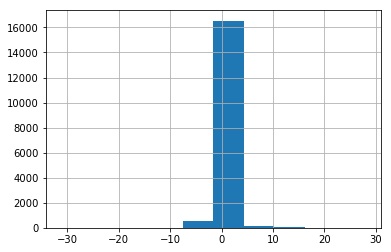

In [35]:
normalized_matrix[normalized_matrix.columns[0]].hist()

# Histogram of First Gene

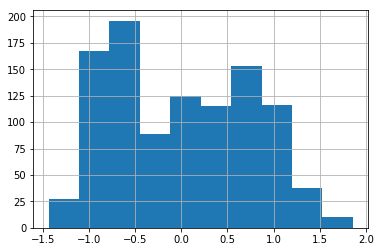

In [36]:
normalized_matrix.loc[normalized_matrix.index[0]].hist()

# Save Normalized Matrix To File

In [37]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Data

In [38]:
net.load_df(normalized_matrix.iloc[:,:100].copy())
net.filter_N_top('row', rank_type='sum', N_top=50)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Create Gene List

In [39]:
gene_list = mf.createGeneList(normalized_matrix)

In [40]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1BG-AS1,503538
2,A1CF,29974
3,A2M,2
4,A2ML1,144568


In [41]:
gene_list.shape

(17337, 2)

# Save Gene List

In [42]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', index=False, compression='gzip')

# Create Attribute List

In [43]:
attribute_list = mf.createAttributeList(normalized_matrix, sample_meta[['Gender', 'Site Primary', 'Histology', 'Cell line primary name']].set_index('Cell line primary name'))

In [44]:
attribute_list.head()

,Gender,Site Primary,Histology
Attributes,,,
1321N1,M,central_nervous_system,glioma
143B,F,bone,osteosarcoma
22Rv1,M,prostate,carcinoma
23132/87,M,stomach,carcinoma
253J,NaN,urinary_tract,carcinoma


In [45]:
attribute_list.shape

(1036, 3)

# Save Attribute List

In [46]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [47]:
standard_matrix = mf.createStandardizedMatix(normalized_matrix)

In [48]:
standard_matrix.head()

,1321N1,143B,22Rv1,23132/87,253J,253J-BV,42-MG-BA,5637,59M,639-V,...,YD-10B,YD-15,YD-38,YD-8,YH-13,YKG1,YMB-1,ZR-75-1,ZR-75-30,huH-1
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0.076951,-0.098726,-0.370925,-0.867062,-0.536948,-0.442354,0.941818,-0.874784,0.447608,0.644520,...,-0.374788,-0.984821,-0.596793,-0.656639,0.690852,0.086604,0.980429,0.878112,0.544132,-0.311079
A1BG-AS1,-0.465257,-0.386107,-0.092672,0.017366,-0.613905,-0.683403,0.631268,-0.173753,0.075282,0.293429,...,0.577214,-0.907340,-0.573365,-0.320469,0.198835,-0.339775,0.613894,0.067560,-0.019313,-0.507728
A1CF,-0.948948,-0.584087,0.923637,0.879235,0.170738,-0.487562,-0.317677,0.359929,0.705490,0.578076,...,0.728657,-0.138141,0.157225,-0.723082,0.095450,-0.821537,-0.192196,-0.087947,-0.323468,0.991207
A2M,0.442456,0.728172,0.695353,-0.484184,0.645160,0.664463,0.150950,-0.750593,-0.885726,-0.794993,...,0.488788,-0.406965,-0.156001,0.589175,0.658673,-0.267969,0.610411,-0.580711,0.656743,-0.146348
A2ML1,0.683533,-0.326121,-0.748900,-0.470908,0.079284,0.569632,0.841835,0.888167,0.548397,0.502065,...,0.656506,-0.380175,0.760755,-0.472837,0.650714,-0.636929,0.245309,0.766545,0.718282,-0.119557


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

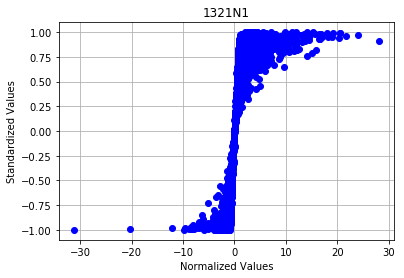

In [49]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [50]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_sample_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [51]:
tertiary_matrix = mf.createTertiaryMarix(standard_matrix)

In [52]:
tertiary_matrix.head()

,1321N1,143B,22Rv1,23132/87,253J,253J-BV,42-MG-BA,5637,59M,639-V,...,YD-10B,YD-15,YD-38,YD-8,YH-13,YKG1,YMB-1,ZR-75-1,ZR-75-30,huH-1
index,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,-1,0,0,0,0,1,0,0,0
A1BG-AS1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
A2M,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [53]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Path to output files

In [54]:
path = '/Users/moshesilverstein/Documents/Harmonizome/CCLE/Output/'

# Create Up Gene Set Library

In [55]:
name = 'ccle_gene_up_set'

In [56]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [57]:
name = 'ccle_gene_down_set'

In [58]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [59]:
name = 'ccle_attribute_up_set'

In [60]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [61]:
name = 'ccle_attribute_down_set'

In [62]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity matrix

In [63]:
attribute_similarity_matix = mf.createSimilarityMatrix(normalized_matrix.T, 'cosine')

In [64]:
attribute_similarity_matix.head()

,1321N1,143B,22Rv1,23132/87,253J,253J-BV,42-MG-BA,5637,59M,639-V,...,YD-10B,YD-15,YD-38,YD-8,YH-13,YKG1,YMB-1,ZR-75-1,ZR-75-30,huH-1
1321N1,1.000000,0.125749,0.043672,-0.039328,0.043957,0.079455,0.273936,0.044251,0.064914,0.115643,...,-0.005525,0.046259,-0.001104,0.072643,0.274045,0.234400,-0.000090,-0.014495,-0.050991,0.056780
143B,0.125749,1.000000,0.039516,-0.058214,-0.057186,0.069184,0.174793,0.126995,0.183264,0.205541,...,0.025815,0.098239,-0.011646,0.017738,0.139001,0.099594,-0.042522,-0.043394,-0.098251,0.009493
22Rv1,0.043672,0.039516,1.000000,0.215549,0.064407,0.061943,-0.054163,-0.013512,-0.049442,0.039281,...,-0.028750,-0.003774,-0.040643,-0.110635,-0.011416,0.068713,0.219408,0.212923,0.161353,0.177271
23132/87,-0.039328,-0.058214,0.215549,1.000000,0.034075,0.029972,-0.067529,0.006591,-0.025333,-0.014296,...,0.078734,0.086693,0.118183,0.002050,-0.069982,-0.037666,0.174947,0.184749,0.236676,0.182736
253J,0.043957,-0.057186,0.064407,0.034075,1.000000,0.717359,0.018934,0.011832,0.039841,-0.061349,...,0.047876,-0.012517,0.101820,0.064035,0.075340,0.088415,0.100150,0.089801,0.068362,0.185701


# HeatMap (clustergrammer) of Attribute Similarity Matrix

In [65]:
net.load_df(attribute_similarity_matix.iloc[:100,:100].copy())
# net.filter_N_top('row', rank_type='sum', N_top=50)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Save Attribute Similarity Matrix

In [66]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene Similarity Matrix

In [67]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [68]:
gene_similarity_matix.head()

index,A1BG,A1BG-AS1,A1CF,A2M,A2ML1,A4GALT,A4GNT,AAAS,AACS,AACSP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
index,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.592609,-0.229904,0.187615,-0.145025,-0.113041,-0.021549,0.003403,-0.154314,0.021758,...,-0.007388,-0.037306,0.057891,-0.037379,0.052251,0.123226,0.276155,-0.083136,0.109190,-0.008501
A1BG-AS1,0.592609,1.000000,-0.140720,0.184649,-0.030053,0.112164,0.007273,-0.097933,-0.080584,0.023537,...,-0.093837,-0.045932,-0.032629,-0.098452,-0.090994,0.134994,0.122261,-0.058044,0.052698,-0.024638
A1CF,-0.229904,-0.140720,1.000000,0.171722,0.019184,0.003857,0.041560,0.082914,0.167644,0.088371,...,-0.054111,-0.062442,-0.080137,0.045756,0.006820,-0.011382,-0.193948,-0.062811,-0.076901,-0.102729
A2M,0.187615,0.184649,0.171722,1.000000,-0.008952,0.009105,-0.008361,-0.088988,-0.071408,0.075980,...,-0.078753,-0.167020,-0.058956,-0.069552,-0.113481,-0.020070,0.092361,0.102702,-0.013138,-0.056797
A2ML1,-0.145025,-0.030053,0.019184,-0.008952,1.000000,0.285845,0.177080,-0.040102,0.017603,0.057860,...,-0.097600,-0.093994,-0.052664,-0.007709,-0.024992,0.000581,-0.122401,-0.028436,-0.061254,-0.084773


# HeatMap (clustergrammer) of Gene Similarity Matrix

In [69]:
net.load_df(gene_similarity_matix.iloc[:50,:50].copy())
# net.filter_N_top('row', rank_type='sum', N_top=50)
net.cluster()
net.widget()

Widget Javascript not detected.  It may not be installed or enabled properly.


# Save Gene Similarity Matrix

In [70]:
filename = '~/./Documents/Harmonizome/CCLE/Output/ccle_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [71]:
path = '/Users/moshesilverstein/Documents/Harmonizome/CCLE/Output/'

In [72]:
name = 'ccle_gene_attribute_edge_list'

In [99]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  1036 Out of 1036   

 The number of statisticaly relevent gene-attribute associations is: 898462


In [97]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/CCLE/my_functions.py'>